# Titanic - Data Exploration #1

## Load libraries

In [1]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import myUtilities as myUtils

## Load dataset

In [2]:
train_set, test_set = myUtils.load_titanic_datasets()

## Explore dataset

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are missing values in Age, Cabin and Embarked.

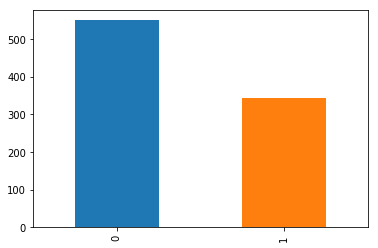

In [15]:
train_set["Survived"].value_counts().plot.bar()
plt.show()

This is the class variable. The dataset is quite balanced.

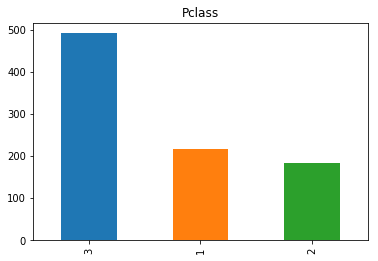

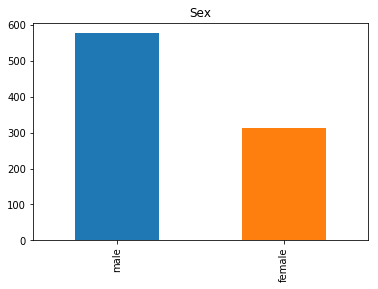

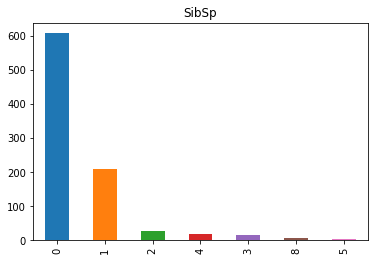

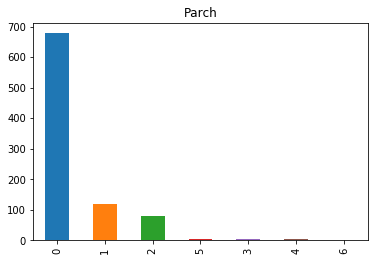

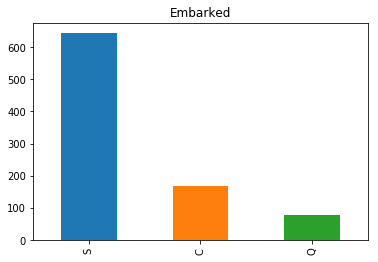

In [33]:
for column in train_set[["Pclass", "Sex", "SibSp", "Parch", "Embarked"]]:
    train_set[column].value_counts().plot.bar(title=column)
    plt.show()

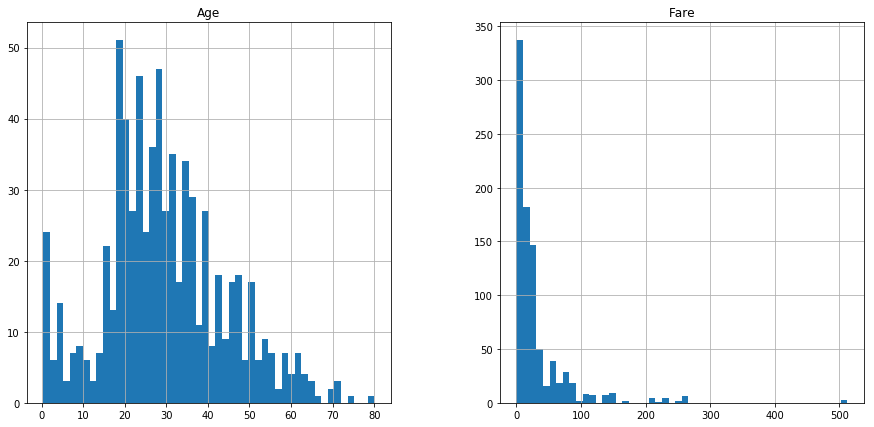

In [55]:
train_set[["Age", "Fare"]].hist(bins=50, figsize=(15, 7))
plt.show()

In [57]:
train_set["Cabin"].value_counts().head()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
C22 C26        3
Name: Cabin, dtype: int64

In [54]:
print(train_set["Ticket"].head())

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object


In [56]:
print(train_set[["PassengerId", "Name"]].head())

   PassengerId                                               Name
0            1                            Braund, Mr. Owen Harris
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...
2            3                             Heikkinen, Miss. Laina
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4            5                           Allen, Mr. William Henry


Cabin number could be used if it can be related to location on the cabin deck; cabin deck can be used. Need some data transformation.

PassengerId, Name and Ticket does not look useful.

Fares could be correlated to cabin number, Pclass.

In [9]:
fare_groupby_pclass = train_set[["Pclass", "Fare"]].groupby("Pclass")
fare_groupby_pclass.groups

{1: Int64Index([  1,   3,   6,  11,  23,  27,  30,  31,  34,  35,
             ...
             853, 856, 857, 862, 867, 871, 872, 879, 887, 889],
            dtype='int64', length=216),
 2: Int64Index([  9,  15,  17,  20,  21,  33,  41,  43,  53,  56,
             ...
             848, 854, 861, 864, 865, 866, 874, 880, 883, 886],
            dtype='int64', length=184),
 3: Int64Index([  0,   2,   4,   5,   7,   8,  10,  12,  13,  14,
             ...
             875, 876, 877, 878, 881, 882, 884, 885, 888, 890],
            dtype='int64', length=491)}

Pclass
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

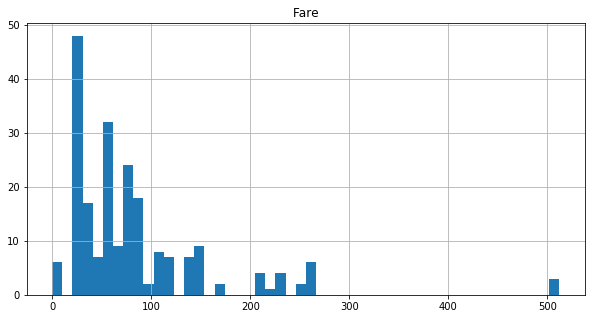

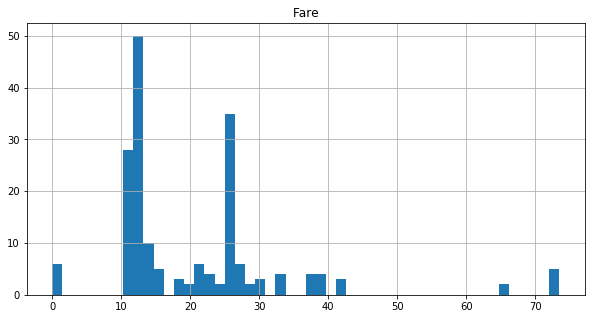

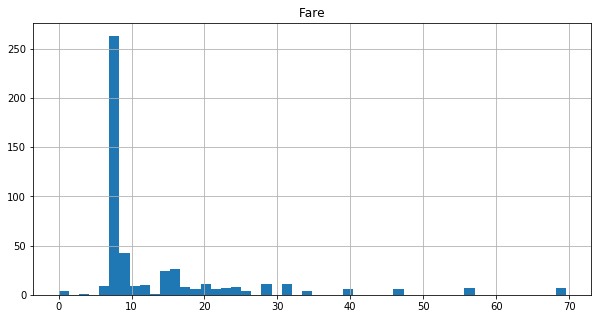

In [14]:
fare_groupby_pclass.hist(bins=50, figsize=(10, 5))

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

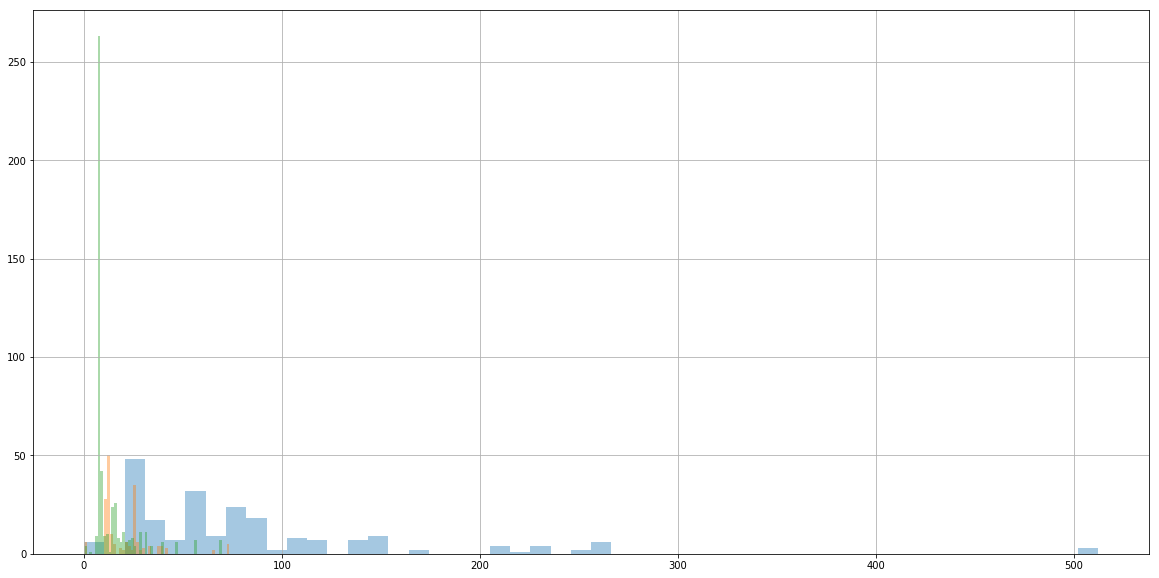

In [24]:
#train_set.groupby("Pclass").Fare.hist(alpha=0.4)
fare_groupby_pclass.Fare.hist(alpha=0.4, bins=50, figsize=(20, 10))

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

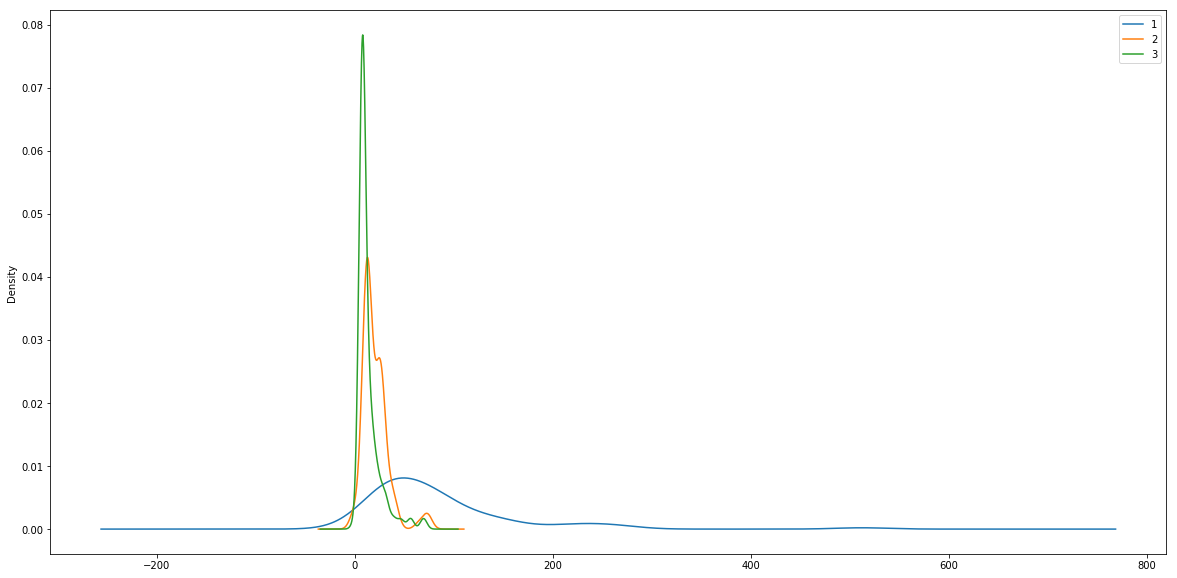

In [27]:
fare_groupby_pclass.Fare.plot(kind='kde', figsize=(20,10), legend=True)

As expected, the mean fare for the Upper class (1) is the highest, followed by that for the Middle class (2) and the Lower class.

In [38]:
train_set.loc[(train_set["Pclass"] == 1) & (train_set["Fare"] < 50)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


There are passengers who paid 0 fare.

In [40]:
train_set.loc[(train_set["Pclass"] == 1) & (train_set["Fare"] < 10)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S


In [54]:
train_set.loc[train_set["Cabin"].str.contains(r'B94', na=False) |
              train_set["Cabin"].str.contains(r'A36', na=False) |
              train_set["Cabin"].str.contains(r'B102', na=False) |
              train_set["Cabin"].str.contains(r'B51', na=False) |
              train_set["Cabin"].str.contains(r'B53', na=False) |
              train_set["Cabin"].str.contains(r'B55', na=False)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S


PassengerId 680 and 873 occupied the same set of cabins (B51, 53, 55) but paid different fares (512 vs 5). PassengerId 264, 807 and 816 paid 0 and did not share their cabins with another passenger.

There does not appear to be any relationship between fare, cabin and ticket number.

In [4]:
train_set.loc[train_set["Cabin"].str.contains(r'D47', na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S


In [5]:
train_set.loc[train_set["Cabin"].str.contains(r'C118', na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7,C118,C


Did not find any passengers sharing the same room for the above 2 passengers with Parch <> 0.

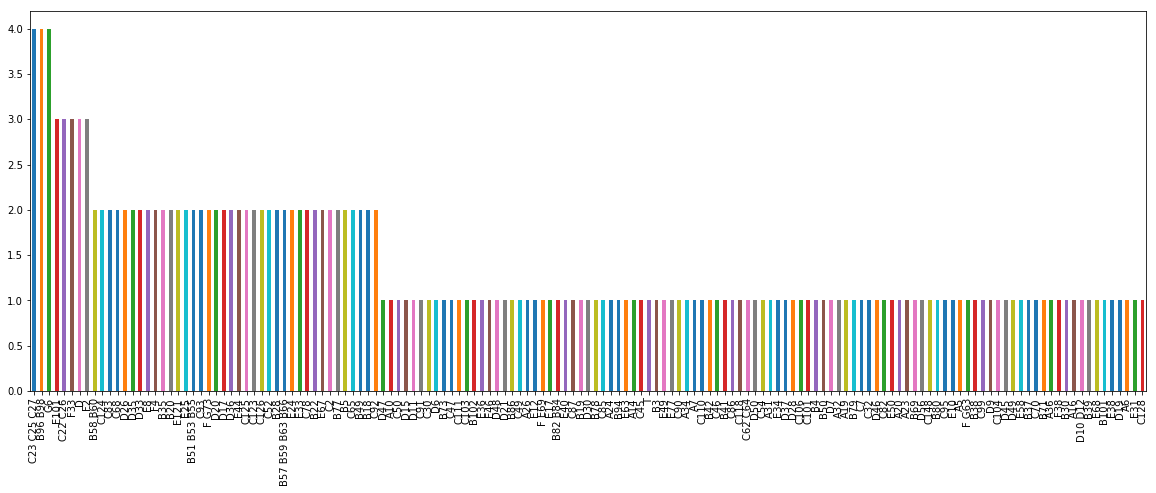

In [7]:
train_set["Cabin"].value_counts().plot.bar(figsize=(20,7))
plt.show()

In [18]:
cabin_cnt = train_set["Cabin"].value_counts()
cabin_cnt.index[cabin_cnt[:] == 3]

Index(['E101', 'C22 C26', 'F33', 'D', 'F2'], dtype='object')

In [19]:
train_set.loc[train_set["Cabin"].str.contains(r'E101', na=False) |
              train_set["Cabin"].str.contains(r'C22 C26', na=False) |
              train_set["Cabin"].str.contains(r'F33', na=False) |
              train_set["Cabin"].str.contains(r'D', na=False) |
              train_set["Cabin"].str.contains(r'F2', na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.7292,D33,C
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.00,0,0,C.A. 29395,10.5000,F33,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C
102,103,0,1,"White, Mr. Richard Frasar",male,21.00,0,1,35281,77.2875,D26,S
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,E101,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.00,0,1,35281,77.2875,D26,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.00,0,2,11752,26.2833,D47,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,F2,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S


There are people sharing cabins who do not have Parch or Sibsp relationships (e.g. E101, D). They could be friends or strangers.

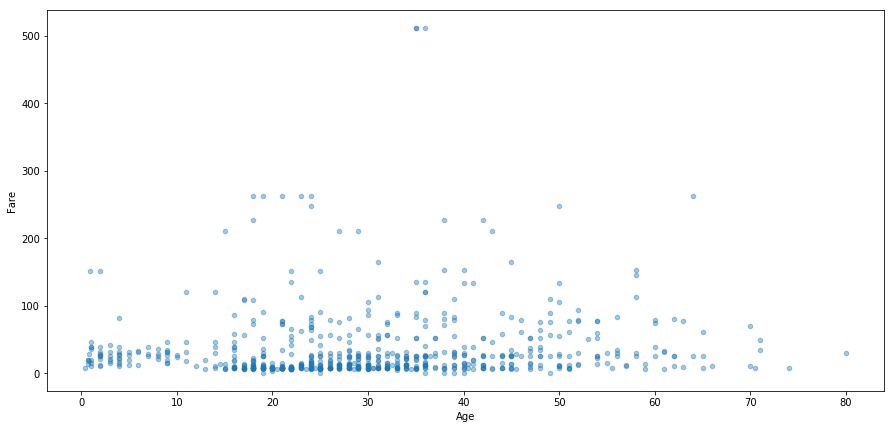

In [50]:
# There does not appear to be any relationship between Age and Fare.

train_set.plot(kind="scatter", x="Age", y="Fare", alpha=0.4, figsize=(15,7))

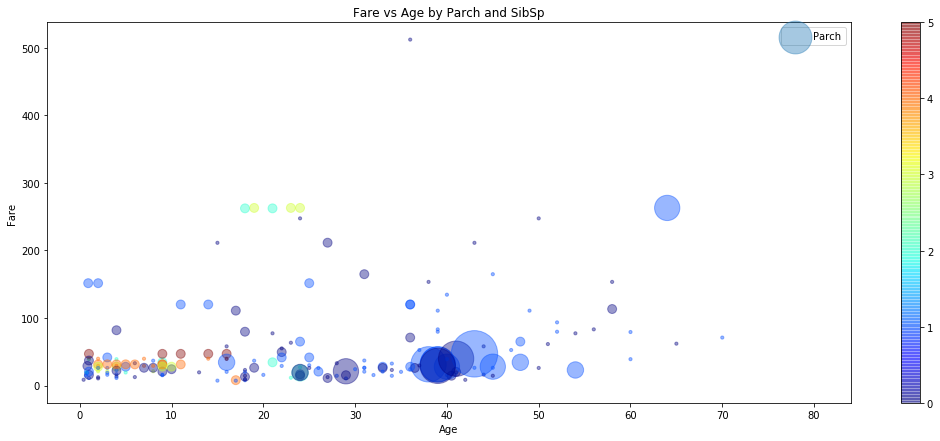

In [49]:
fig, ax = plt.subplots()
train_set.plot(kind="scatter", x="Age", y="Fare",
               s=(train_set["Parch"]**3)*10, label="Parch",
               c=train_set["SibSp"], cmap=plt.get_cmap("jet"), colorbar=True,
               title="Fare vs Age by Parch and SibSp",
               alpha=0.4, figsize=(18,7),
               ax=ax)
plt.legend()

There are families with more than 2 young children (<10 yrs). The parents are around 30-50 yrs old.

In [52]:
train_set.loc[train_set["Fare"] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


The outlier for Fare shows something interesting; the passengers are all on the same ticket number.

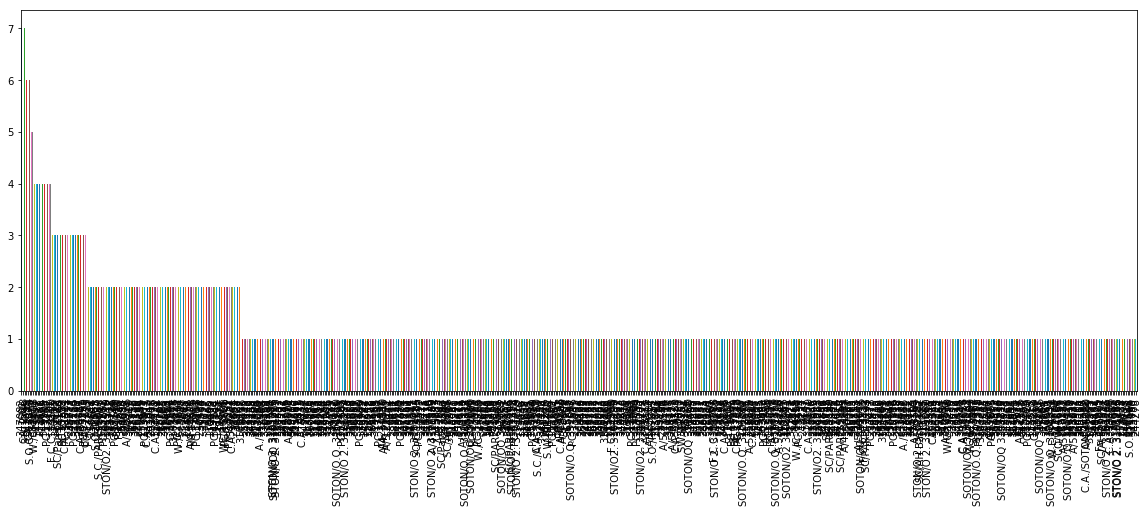

In [53]:
train_set["Ticket"].value_counts().plot.bar(figsize=(20,7))
plt.show()

In [55]:
ticket_cnt = train_set["Ticket"].value_counts()
ticket_cnt.index[ticket_cnt[:] == 7]

Index(['347082', '1601', 'CA. 2343'], dtype='object')

In [56]:
train_set.loc[train_set["Ticket"] == "347082"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [58]:
# The people on the same tickets may not have any Parch and SibSp relationships, but they likely know each other i.e. friends or at least acquaintances.

train_set.loc[train_set["Ticket"] == "1601"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


We can use Ticket to create a new feature for # of friends travelling together aboard the Titanic. Based on Ticket, this relationship is likely a superset of the Parch / SibSp relationships, assuming parents, children siblings are travelling on the same Ticket.

This is a better feature than using Cabin as people sharing the same cabin may be on different Tickets and hence may be strangers to eah other. Also, there are missing values for Cabin.

We could use the Cabin to create a new feature Deck as this indicates general location aboard the Titanic.

No handles with labels found to put in legend.


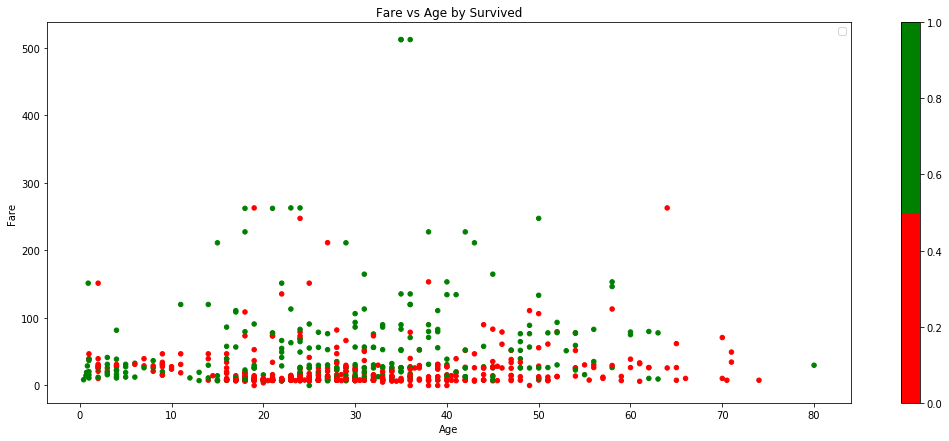

In [63]:
from matplotlib import colors

fig, ax = plt.subplots()
train_set.plot(kind="scatter", x="Age", y="Fare",
               c=train_set["Survived"], cmap=colors.ListedColormap(['red', 'green']), colorbar=True,
               title="Fare vs Age by Survived",
               alpha=1.0, figsize=(18,7),
               ax=ax)
plt.legend()

There does not appear to be any obvious relationship between Survived, Age and Fare. However, the passengers Age > 65 mostly did not survive.

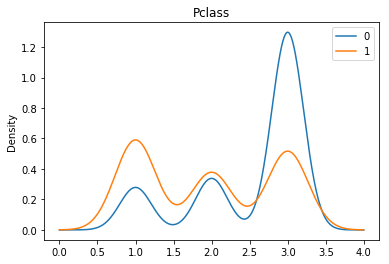

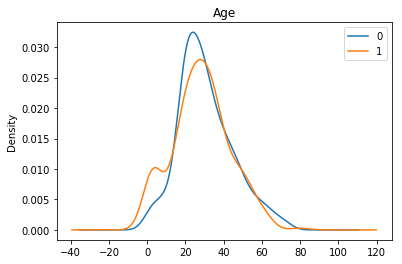

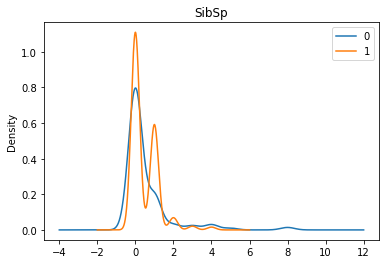

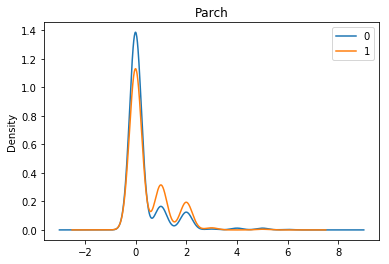

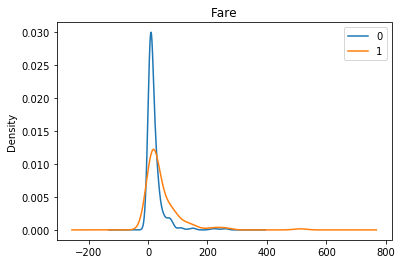

In [14]:
for col_name in ['Pclass', 'Age', 'SibSp', 'Parch','Fare']:
    train_set.groupby("Survived")[col_name].plot(kind='kde', title=col_name, legend=True)
    plt.show()

From the plots, only Pclass appears to be a predictor for Survived. More passengers in 3rd class did not survive.

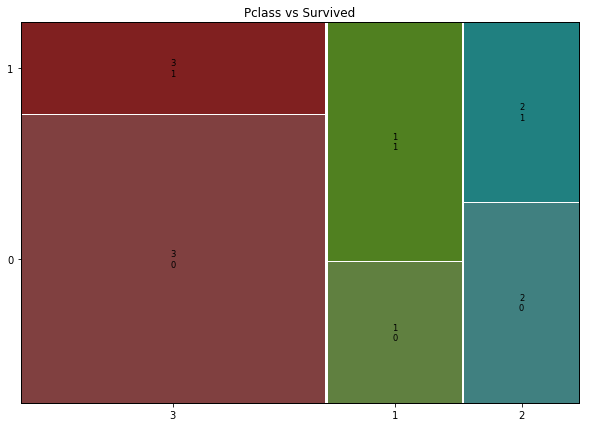

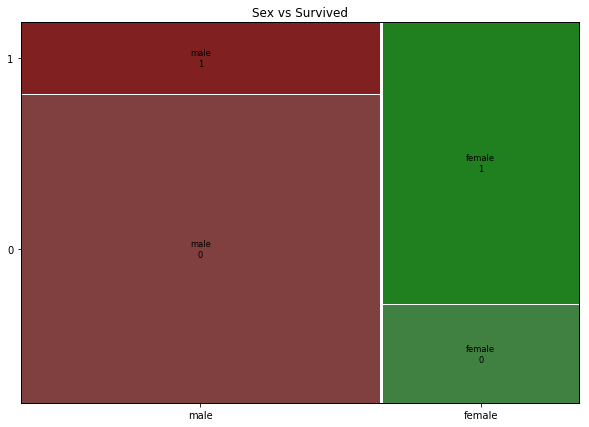

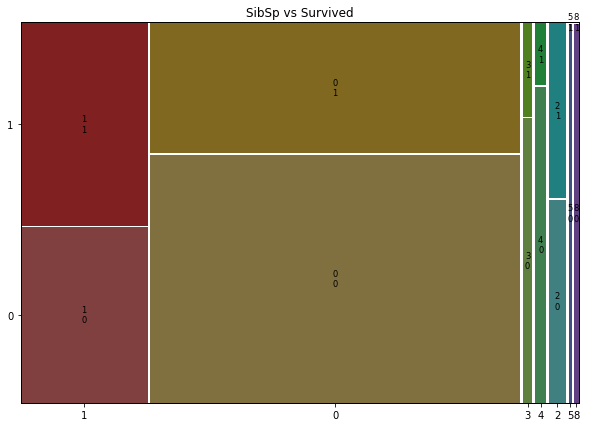

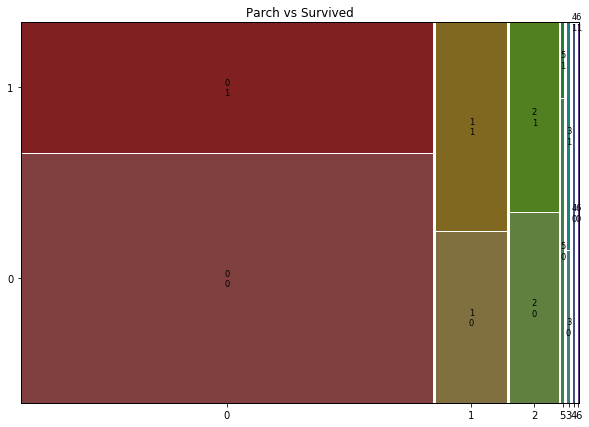

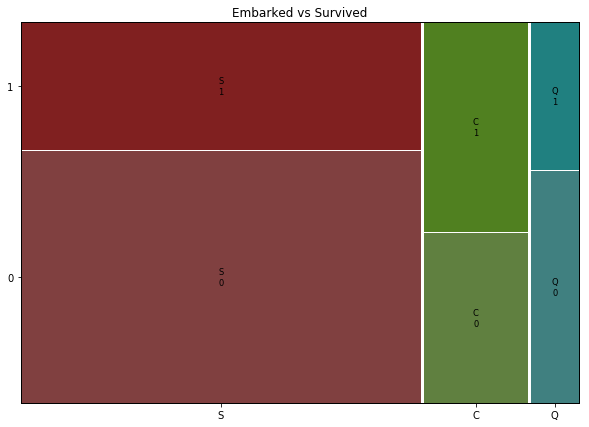

In [37]:
from statsmodels.graphics.mosaicplot import mosaic

for col_name in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    fig, ax = plt.subplots(figsize=(10, 7))
    mosaic(train_set, [col_name, "Survived"], title=col_name + " vs Survived", ax=ax)
    plt.show()

More PClass = 3 passengers did not survive. More females survived than males. More passegers from Cherbourg survive than those from Queenstown and Southhamptom. Strangely, more Parch = 0 passengers did not survive compared to those of Parch = 2 or 3.

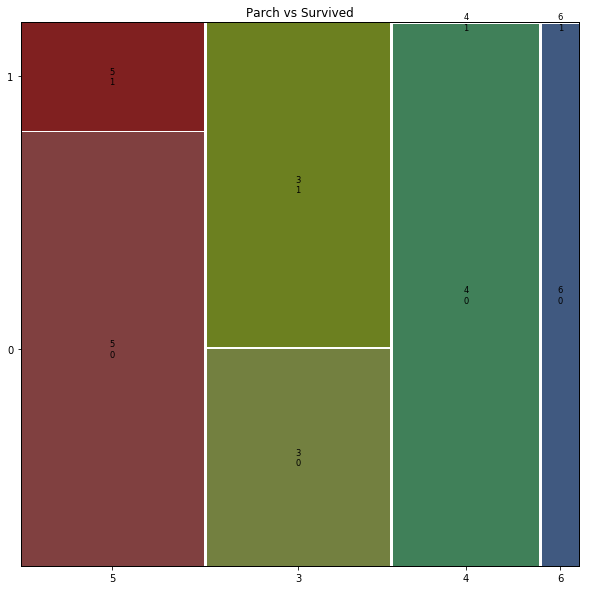

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
mosaic(train_set.loc[train_set["Parch"] > 2], ["Parch", "Survived"], title="Parch vs Survived", ax=ax)
plt.show()

Most of the passengers with Parch > 3 did not survive.

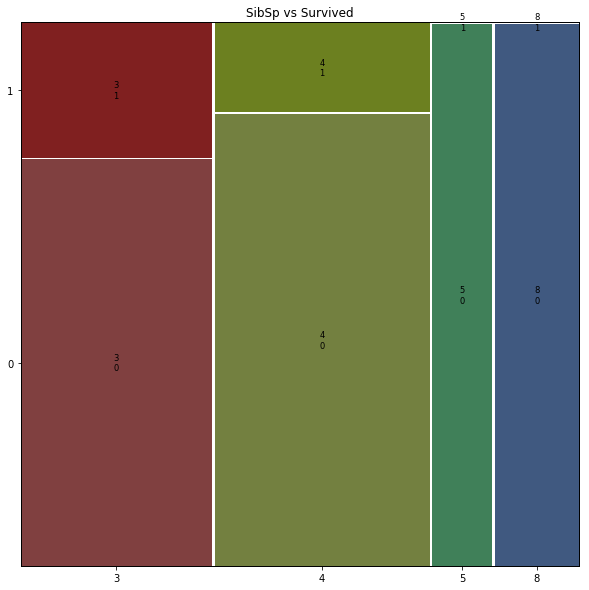

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
mosaic(train_set.loc[train_set["SibSp"] > 2], ["SibSp", "Survived"], title="SibSp vs Survived", ax=ax)
plt.show()

Most of the passengers with SibSp > 2 did not survive.

## Findings

Among the feature variables, only Fare does not appear to be useful. Pclass, Sex, Age, SibSp, Parch, Embarked appear to be useful. Ticket and Cabin need to be transformed to # friends aboard and deck for further exploration.

Age and Cabin have substantial numbers of missing values which need to be imputed.